### How to use the spectrum class

- you can define quick spectrum subclasses in your script (example in this script)
- you can import spectrum subclasses from the spectrum_models folder (not all working currently)

In [1]:
# python modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import importlib
import json

# All the logging stuff should be defined in your main script!
import logging
logging.basicConfig(level=logging.CRITICAL, format='%(asctime)s - %(name)s - %(levelname)s - %(message)s')
logger = logging.getLogger("divertor_spectroscopy")
logger.setLevel(logging.DEBUG)

# my own modules
from divertor_spectroscopy import spectrum
from divertor_spectroscopy import utilities as utils
from divertor_spectroscopy import instrument
from divertor_spectroscopy import analysis
from divertor_spectroscopy import spectral_line_classes
from divertor_spectroscopy import datasource_qss
from divertor_spectroscopy.spectrum_models import ip160_cw_760_grating150_Ne_calibration
from divertor_spectroscopy.spectrum_models import ip160_cw_600_grating600_Ne_calibration
from divertor_spectroscopy import wavelength_calibration


ground_path = "//share.ipp-hgw.mpg.de/Documents/frhe/Documents/phd/" # the ground path is used for saving and loading data

### What do we need for building and fitting a spectrum?
- spectrum model
- instrument information

http://archive-webapi.ipp-hgw.mpg.de/ArchiveDB/raw/W7X/QSS_DivertorSpectroscopy/PI_CCD_04_1-QSS60OC092_DATASTREAM/0/Images


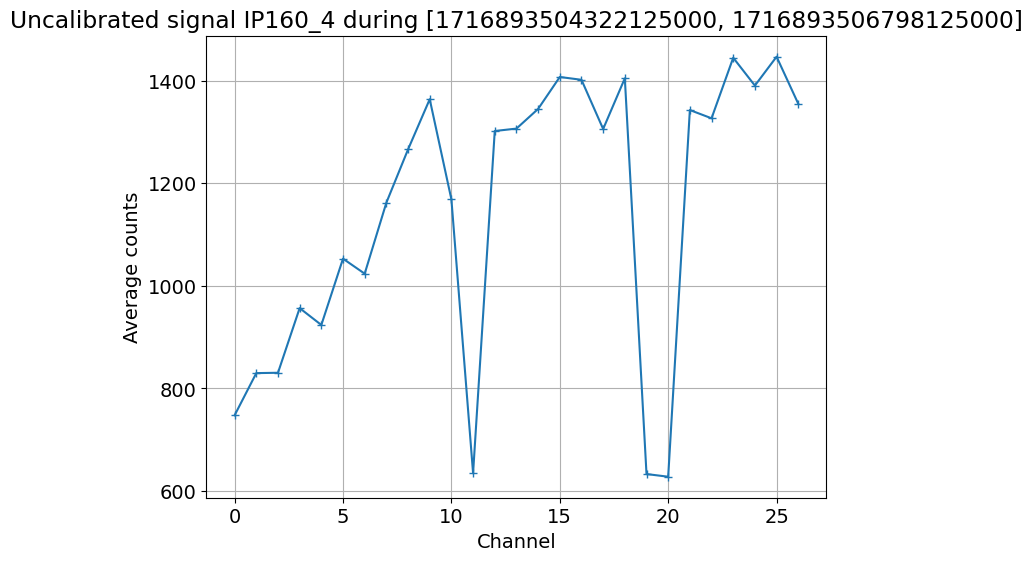

2024-06-21 16:19:00,319 - divertor_spectroscopy.datasource_qss - DEBUG - You need to produce your wavelength vector yourself
2024-06-21 16:19:00,334 - divertor_spectroscopy.datasource_qss - DEBUG - You don't have a wavelength guess for this camera/cw
2024-06-21 16:19:00,335 - divertor_spectroscopy.datasource_qss - DEBUG - You don't have an intensity calibration


In [2]:
camid = "IP160_4"
grating = "600"
cw = 600

if camid == "IP160_4":
    broken_channels = [11,19,20]
    if grating == "600":
        if cw == 600:
            time_stamp = [1716893504322125000,1716893506798125000] # binned IP160_4 grating 600 cw 600 nm
            model = ip160_cw_600_grating600_Ne_calibration.Ip160_cw_600_grating600_Ne_calibration()
            width = 0.2
            wavelength_coefficients_guess = [605,0.098]
            lower_bounds = [600,0.09]
            upper_bounds = [615,0.11]
#time_stamp = [1717069205089125000,1717069227478125000] # unbinned
#time_stamp = [1717069443756125000,1717069446232125000] # binned IP160_2 grating 150 760 nm

ds_qss = datasource_qss.Datasource_qss(time_id=time_stamp, camid=camid,ical=False,wcal=False,debug=True,database_path="ArchiveDB",broken_channels=[])

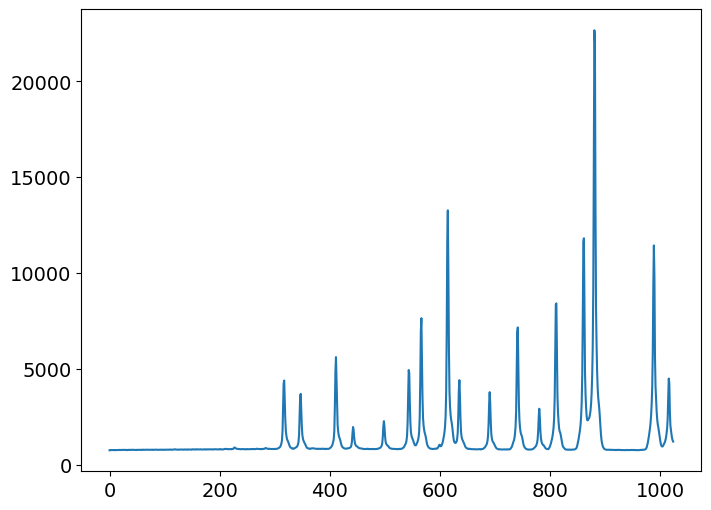

In [3]:
plt.figure(figsize=(8,6))
experiment_data = np.nanmean(ds_qss.data["signal_counts"][:,15],0)
plt.plot(experiment_data)
plt.show()

### Testing wavelength calibration using analysis class and synthetic spectrum

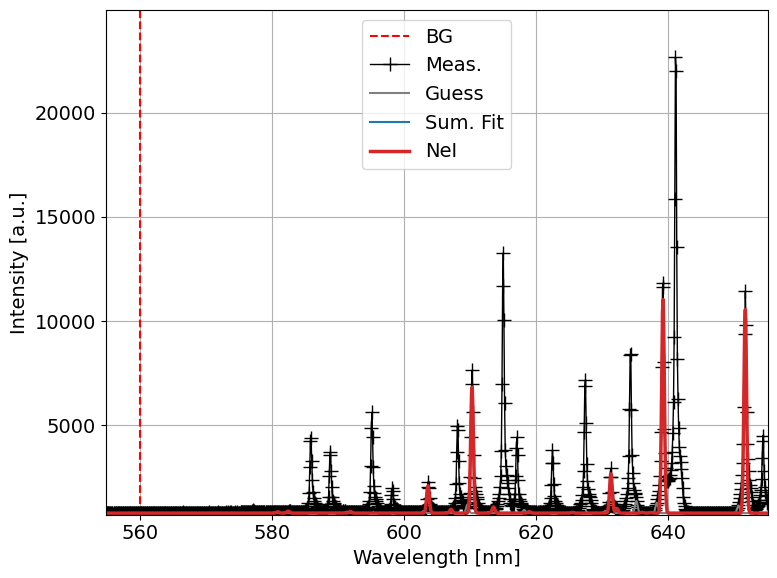

In [4]:
#%matplotlib widget
importlib.reload(analysis)
instrument_function_mode = "gauss"
numeric_instrument_function = None
highlight_tags = model.all_tags
inst = instrument.Instrument(wavelength_coefficients_guess=wavelength_coefficients_guess,lower_bounds=lower_bounds,upper_bounds=upper_bounds,width=width,instrument_function_mode=instrument_function_mode,numeric_instrument_function=numeric_instrument_function)
analyse_wl = analysis.Analysis(model=model,instrument=inst)
analyse_wl.get_default_fit_parameters()
analyse_wl.fit_spectrum(experiment_data=experiment_data,mode="wavelength_calibration")
analyse_wl.set_fit_description()
scale = "linear"
analyse_wl.display_spectrum(highlight_tags=highlight_tags,scale=scale)


In [5]:
analyse_wl.format_fit_output()
analyse_wl.fit_output

fit_description  fit_parameters  fit_parameters_linear  \
0   wavelength_coefficient_0      604.349160             604.349160   
1   wavelength_coefficient_1        0.097205               0.097205   
2      Intensity_NeI_580.444        1.509328              32.309355   
3      Intensity_NeI_582.015        1.683162              48.212737   
4      Intensity_NeI_591.363        1.574402              37.532065   
5      Intensity_NeI_602.999        2.825944             669.798149   
6      Intensity_NeI_606.453        1.956606              90.491140   
7      Intensity_NeI_609.616        3.486596            3066.170449   
8      Intensity_NeI_612.844        2.169904             147.878032   
9      Intensity_NeI_618.214        1.532269              34.061949   
10     Intensity_NeI_624.672        1.199300              15.823396   
11     Intensity_NeI_630.478        2.980159             955.342423   
12     Intensity_NeI_631.368        2.057327             114.110856   
13     Intensity_NeI_635.185        1.274186              18.801203   
14     Intensity_NeI_636.499        1.157685              14.377563   
15     Intensity_NeI_638.299        3.713874            5174.566300   
16     Intensity_NeI_650.652        3.691447            4914.128613   

         guess  lower_bounds  upper_bounds  
0   605.000000    600.000000     615.00000  
1     0.098000      0.090000       0.11000  
2     1.273896      0.848504       6.05544  
3     1.263815      0.848504       6.05544  
4     1.551121      0.848504       6.05544  
5     1.709392      0.848504       6.05544  
6     1.274591      0.848504       6.05544  
7     2.319743      0.848504       6.05544  
8     1.450844      0.848504       6.05544  
9     1.887889      0.848504       6.05544  
10    0.965127      0.848504       6.05544  
11    1.716476      0.848504       6.05544  
12    2.933415      0.848504       6.05544  
13    2.472734      0.848504       6.05544  
14    0.848504      0.848504       6.05544  
15    2.404054      0.848504       6.05544  
16    2.272629      0.848504       6.05544

### Calibrate entire spectrometer

27
1024


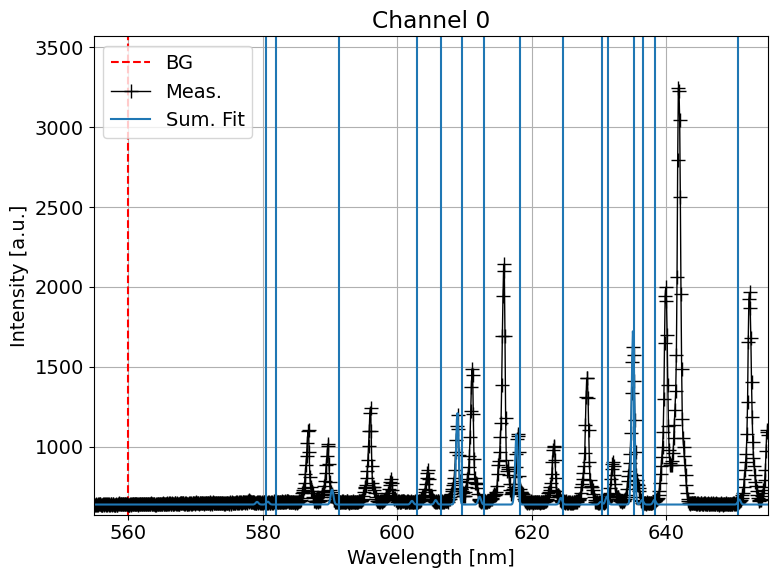

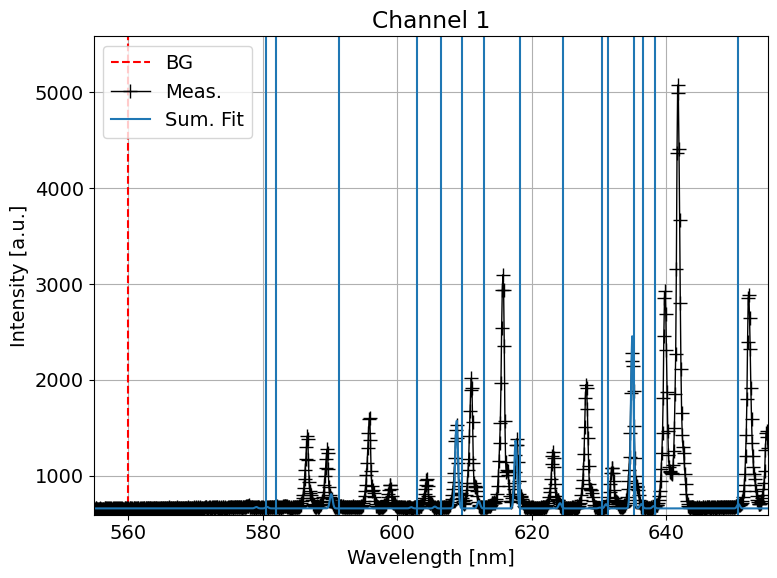

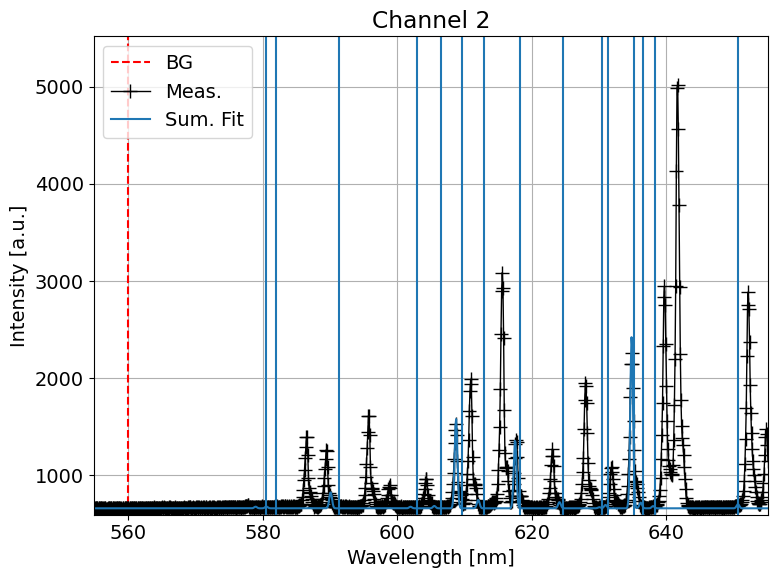

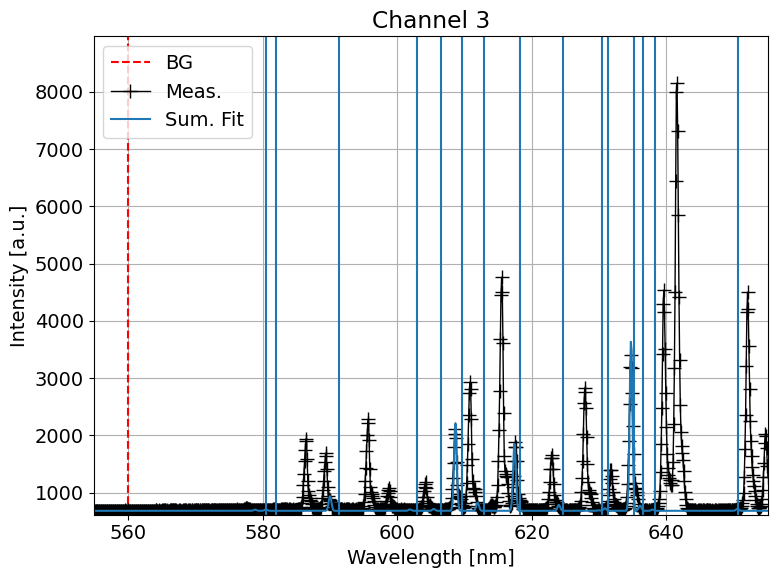

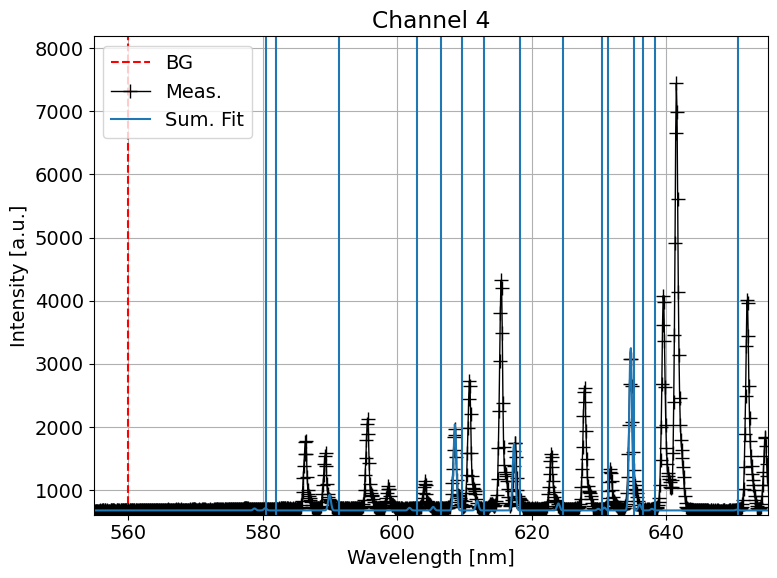

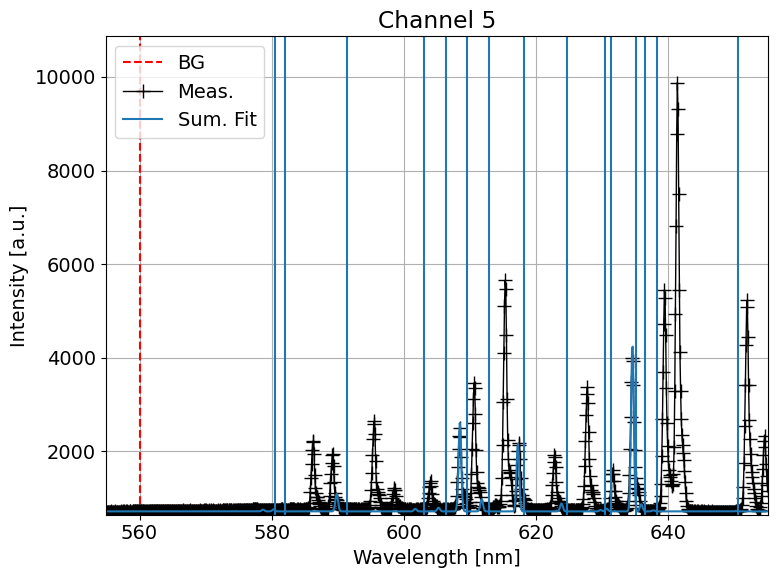

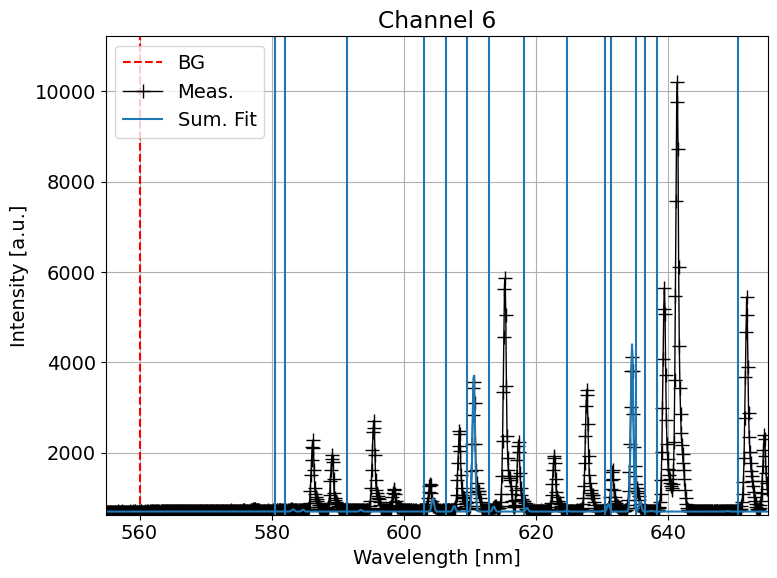

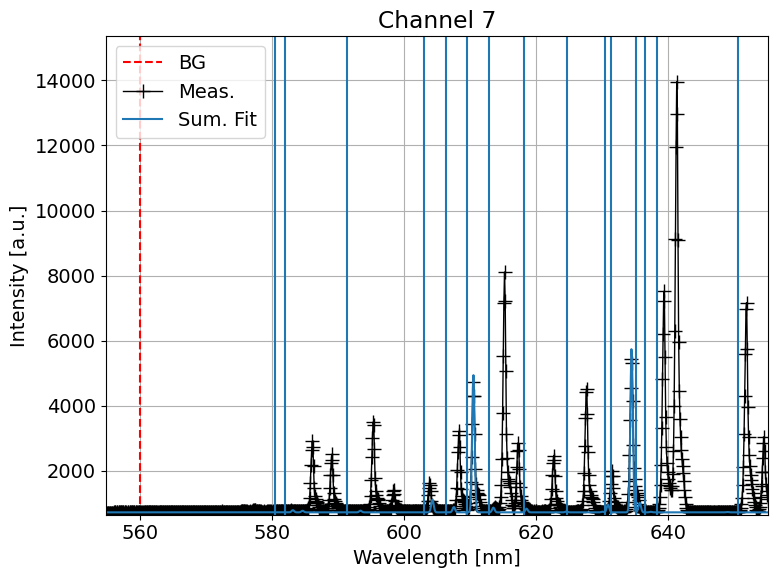

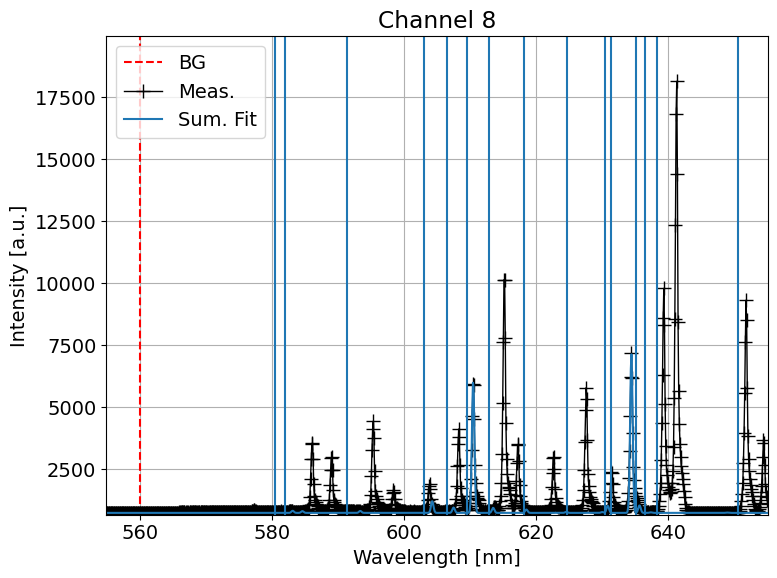

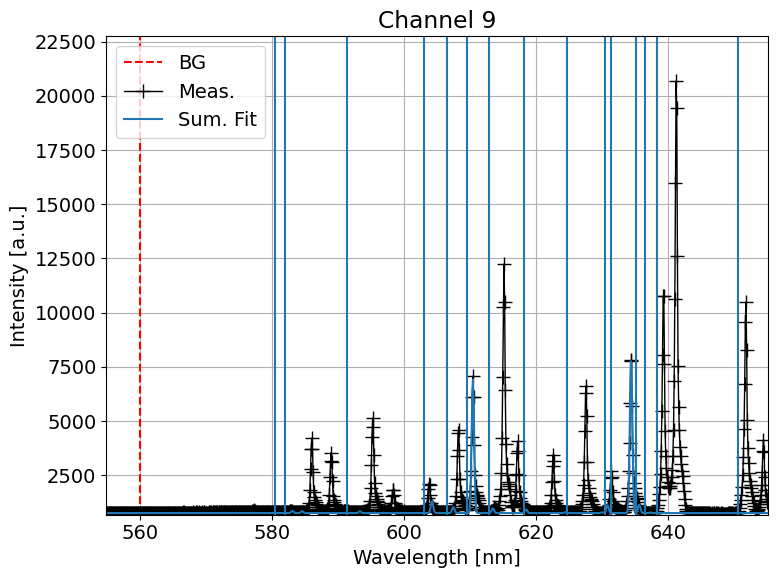

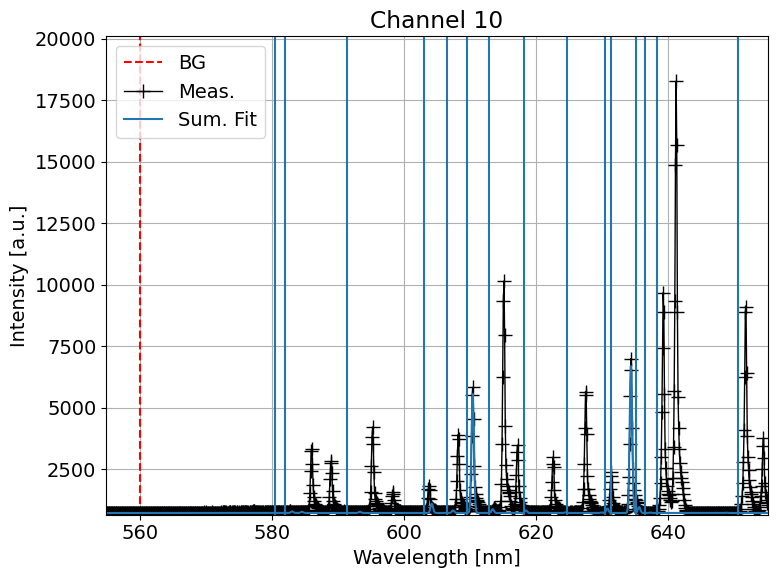

Skipping broken channel 11


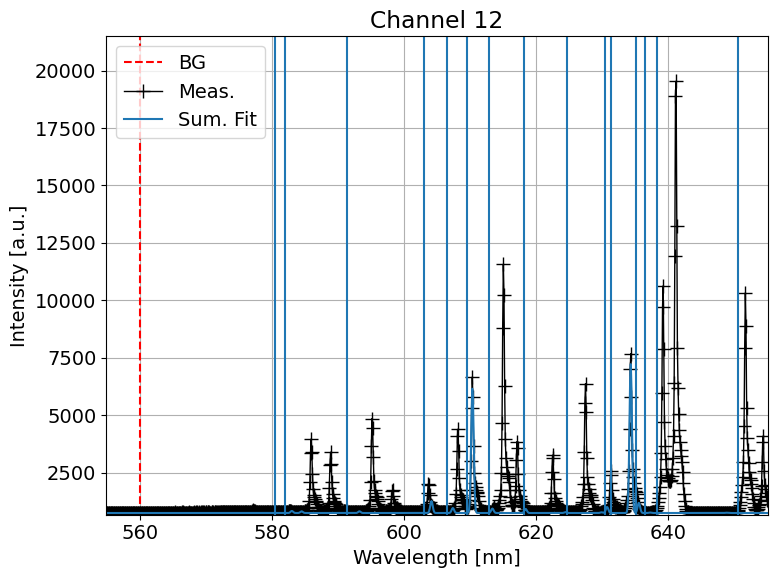

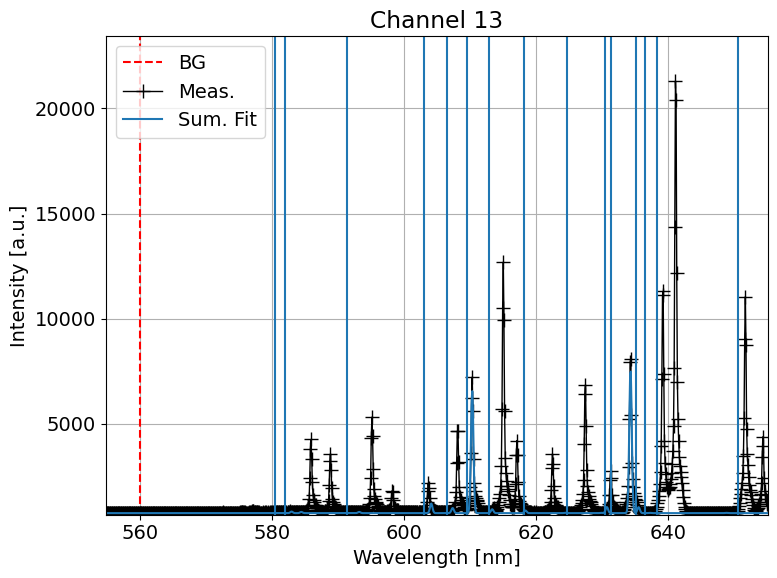

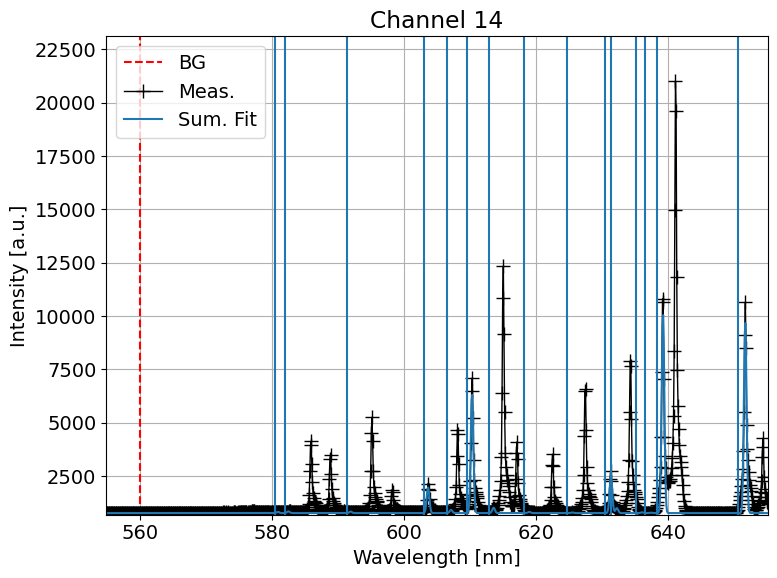

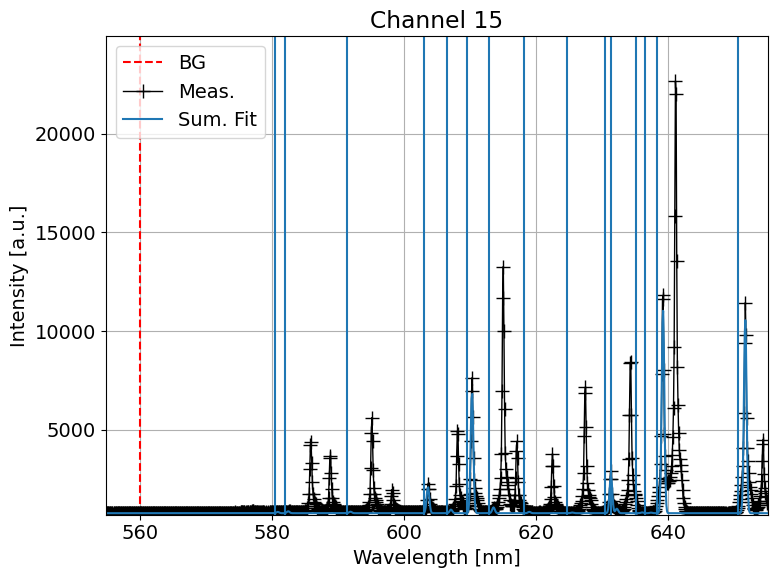

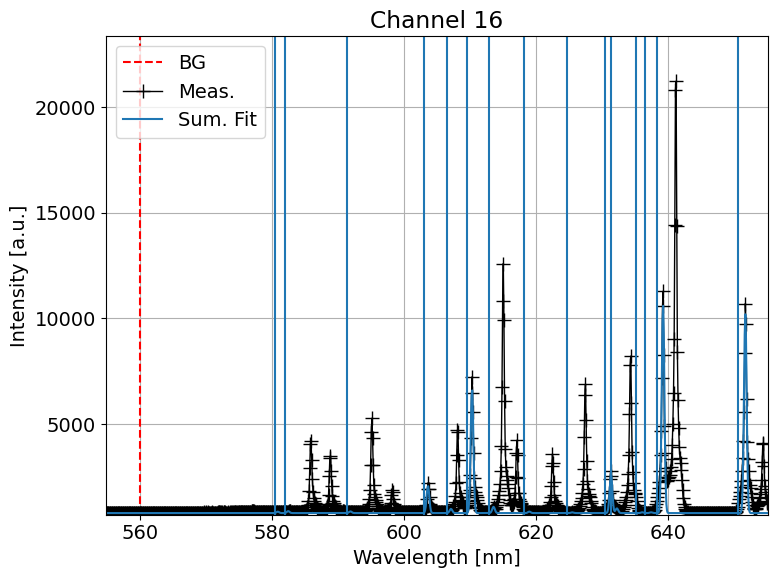

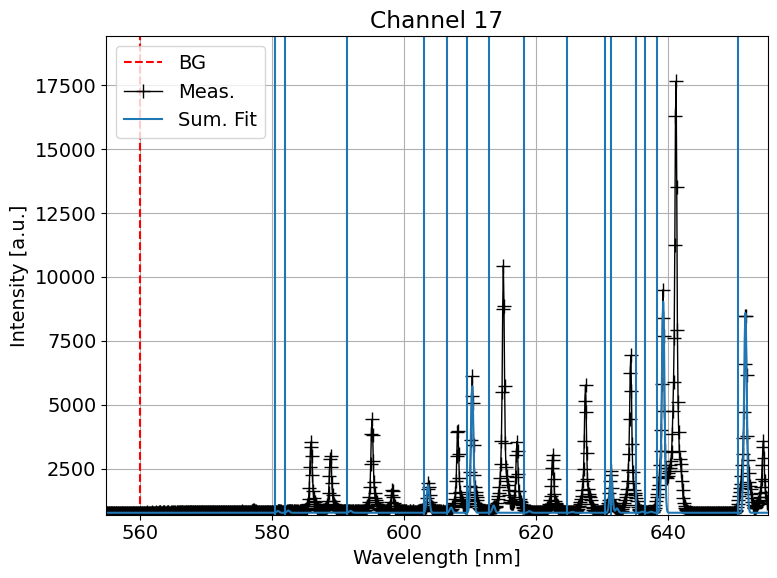

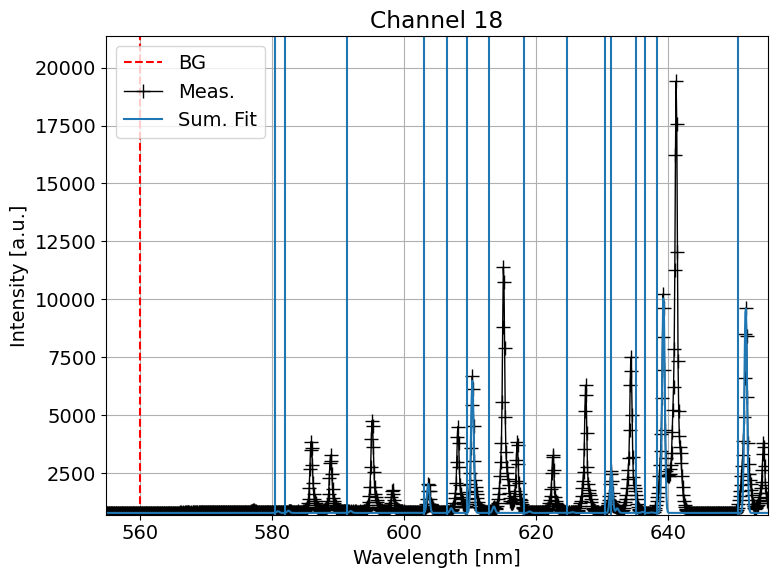

Skipping broken channel 19
Skipping broken channel 20


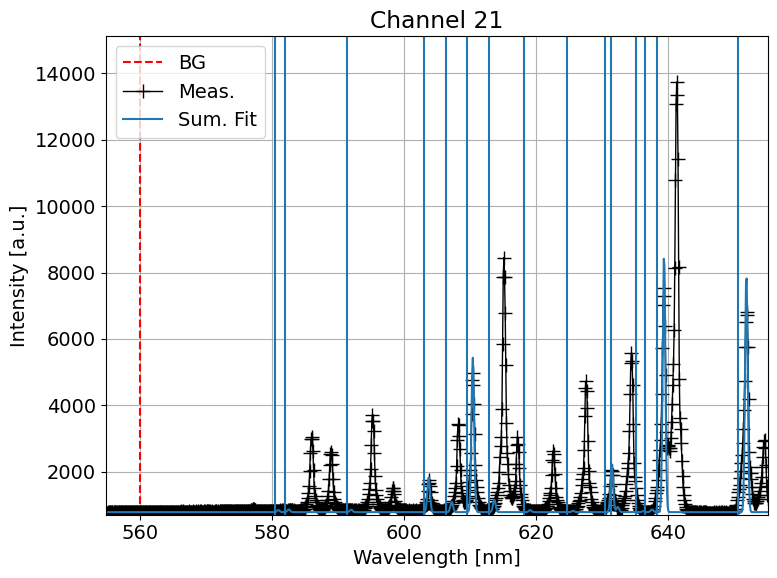

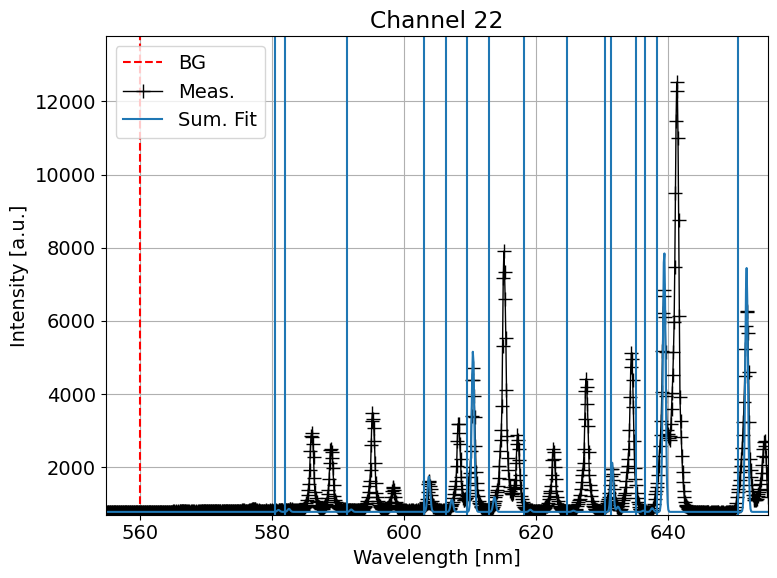

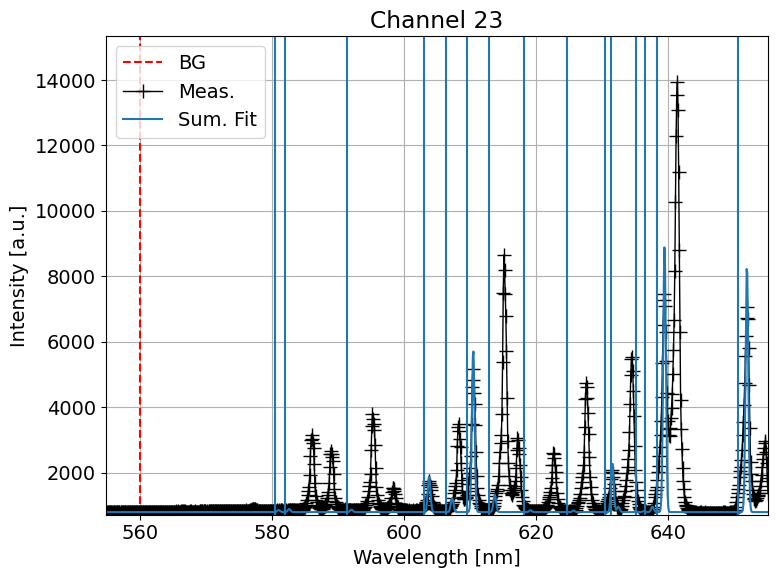

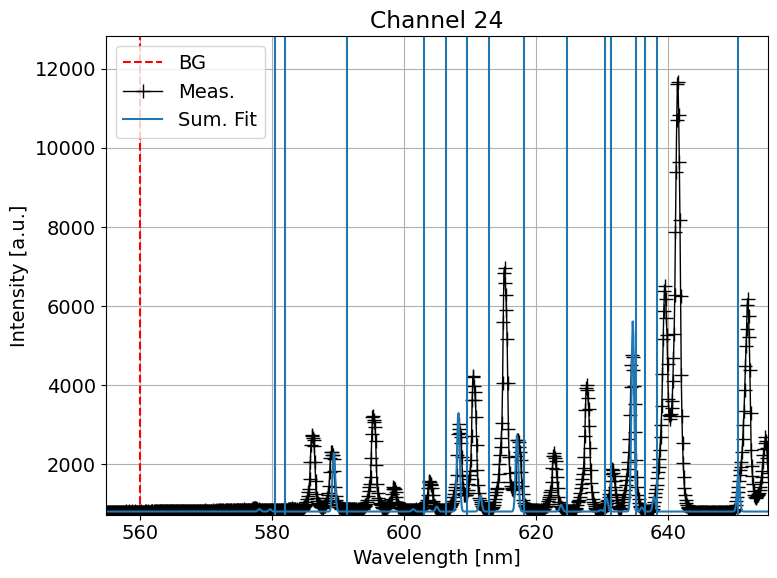

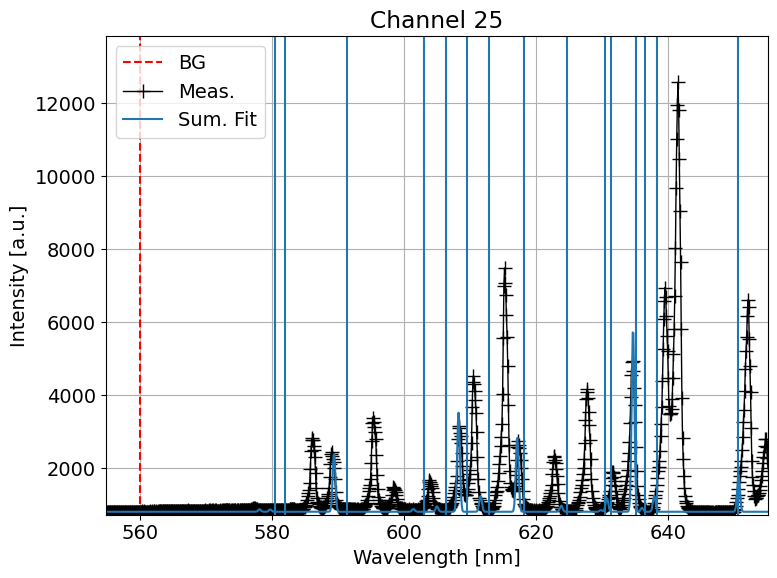

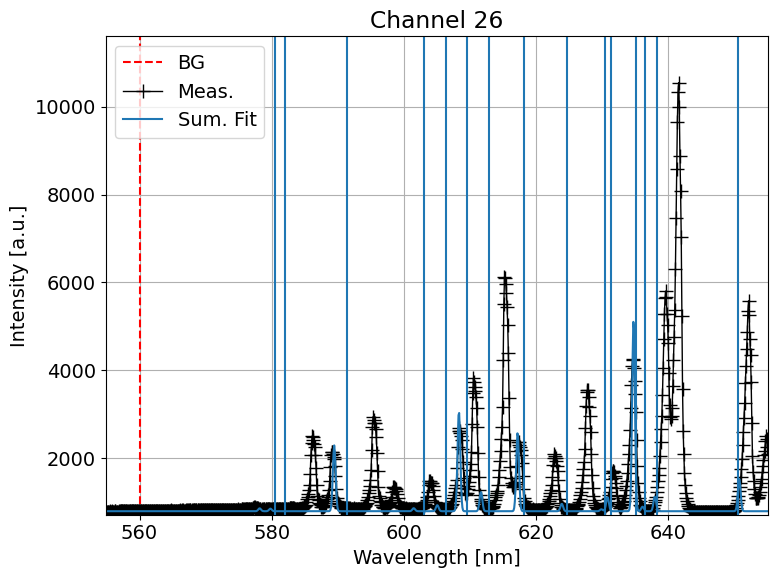

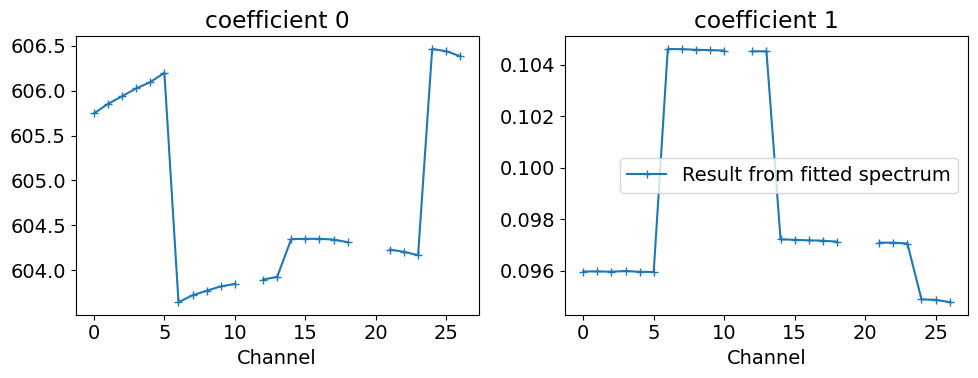

array([[556.65571981, 556.75169355, 556.84766729, ..., 654.64490669,
        654.74088043, 654.83685417],
       [556.7602034 , 556.85618145, 556.95215951, ..., 654.75379749,
        654.84977555, 654.9457536 ],
       [556.85168905, 556.94765584, 557.04362264, ..., 654.83378772,
        654.92975451, 655.02572131],
       ...,
       [557.92898912, 558.02387828, 558.11876744, ..., 654.81082511,
        654.90571427, 655.00060344],
       [557.91168247, 558.00655643, 558.10143039, ..., 654.77799468,
        654.87286864, 654.9677426 ],
       [557.90030453, 557.99509108, 558.08987763, ..., 654.67737254,
        654.77215909, 654.86694564]])

In [6]:
importlib.reload(wavelength_calibration)
spectrum = np.nanmean(ds_qss.data["signal_counts"],0)
highlight_tags = model.all_tags
wavelength_calibration.calibrate_spectrometer_using_analysis_class(spectrum=spectrum,model=model,wavelength_coefficients_guess=wavelength_coefficients_guess,lower_bounds=lower_bounds,upper_bounds=upper_bounds,width=width,broken_channels=broken_channels,debug=True)